In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
#Project setup

raw_input_data_path = "C:/Users/Alovsat Abdullayev/Desktop/UW/Lessons/Extra year/Machine learining 1/Project/Data/Input"
preprocessed_output_data_path = "C:/Users/Alovsat Abdullayev/Desktop/UW/Lessons/Extra year/Machine learining 1/Project/Data/output"
btc_data = pd.read_csv(f"{raw_input_data_path}/BTC_USD_Price_Prediction_Data.csv")
btc_data.head(10)


,Unnamed: 0,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,1024,BTC,1/1/2017,663.03400,674.00800,674.85200,660.69300
1,1025,BTC,1/2/2017,667.74700,663.03400,668.19700,663.03400
2,1026,BTC,1/3/2017,655.72500,667.74700,668.05800,646.15400
3,1027,BTC,1/4/2017,655.89500,655.72500,657.43800,649.75800
4,1028,BTC,1/5/2017,661.28400,655.89500,664.91800,653.58300
5,1029,BTC,1/6/2017,656.41800,661.28400,662.30600,654.12799
6,1030,BTC,1/7/2017,651.82899,656.41800,657.72799,645.65000
7,1031,BTC,1/8/2017,657.91599,651.82899,660.51000,648.92499
8,1032,BTC,1/9/2017,656.42700,657.91599,659.63100,655.16099
9,1033,BTC,1/10/2017,657.68100,656.42700,659.25299,655.38500


In [4]:
#Dropping unnecessary columns

btc_data.drop(
    columns=[
        "Unnamed: 0",
        "Currency",
            ],
    inplace=True,
)

btc_data.shape


(1763, 5)

In [5]:
# Display basic information and the first few rows of the dataset
btc_info = btc_data.info()
btc_head = btc_data.head()

btc_info, btc_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1763 non-null   object 
 1   Closing Price (USD)  1763 non-null   float64
 2   24h Open (USD)       1763 non-null   float64
 3   24h High (USD)       1763 non-null   float64
 4   24h Low (USD)        1763 non-null   float64
dtypes: float64(4), object(1)
memory usage: 69.0+ KB


(None,
        Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
 0  1/1/2017              663.034         674.008         674.852   
 1  1/2/2017              667.747         663.034         668.197   
 2  1/3/2017              655.725         667.747         668.058   
 3  1/4/2017              655.895         655.725         657.438   
 4  1/5/2017              661.284         655.895         664.918   
 
    24h Low (USD)  
 0        660.693  
 1        663.034  
 2        646.154  
 3        649.758  
 4        653.583  )

In [6]:
# Converting the 'Date' column to datetime format
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Set the 'Date' column as the index of your DataFrame for easy plotting
btc_data.set_index('Date', inplace=True)


# Display the first few rows of the DataFrame after conversion
btc_data.head()


,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,
2017-01-01,663.034,674.008,674.852,660.693
2017-01-02,667.747,663.034,668.197,663.034
2017-01-03,655.725,667.747,668.058,646.154
2017-01-04,655.895,655.725,657.438,649.758
2017-01-05,661.284,655.895,664.918,653.583


<Axes: >

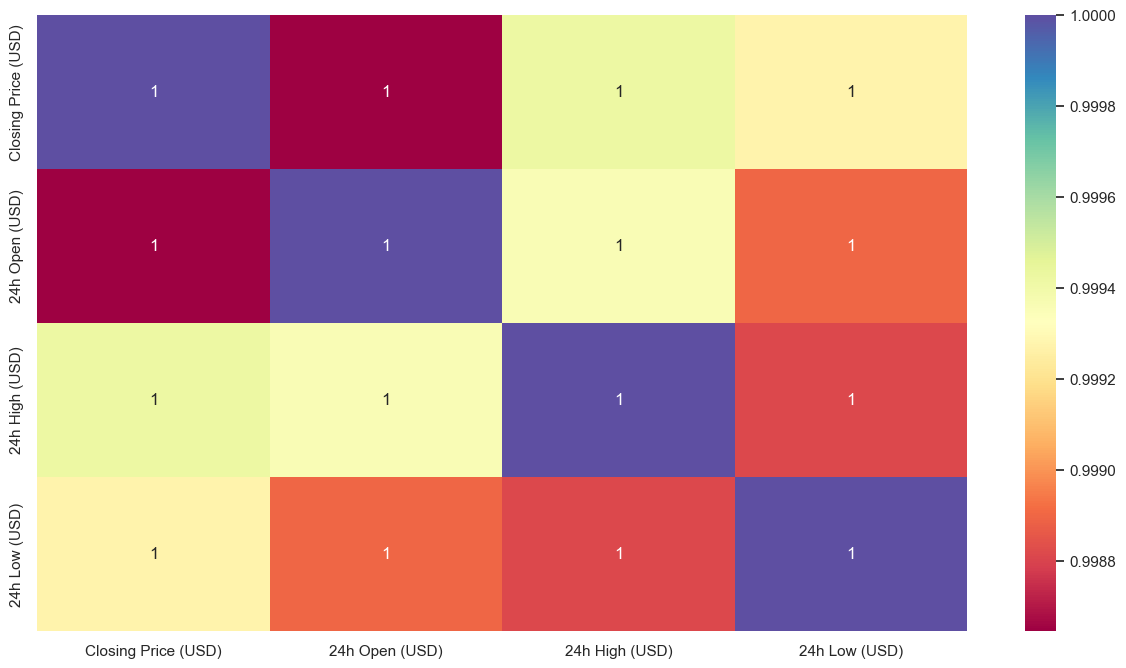

In [7]:
#Linearity test

import seaborn as sns
corr = btc_data.corr()
sns.set(rc = {"figure.figsize": (15, 8)})

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,
            annot = True, cmap = "Spectral")

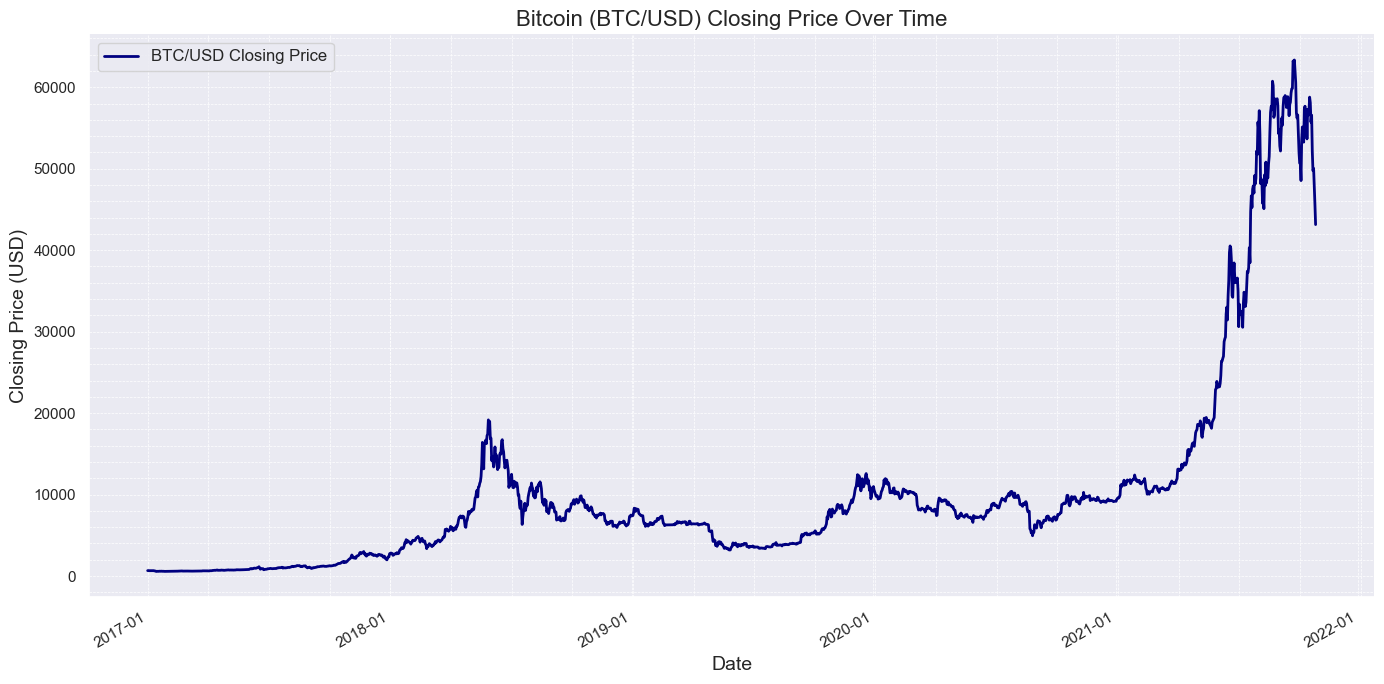

In [8]:
# Bitcoin Closing Price plot


plt.figure(figsize=(14, 7))  # Larger figure size
plt.plot(btc_data.index, btc_data['Closing Price (USD)'], color='navy', linewidth=2, label='BTC/USD Closing Price')

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('Bitcoin (BTC/USD) Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Remove the plot frame lines on the top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

In [9]:
# Check for Stationarity with the Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
 # Run stationarity test on the original 'Closing Price (USD)
check_stationarity(btc_data['Closing Price (USD)'])

#ADF Statistic: A positive value indicates the presence of a unit root, suggesting the series is non-stationary. In traditional statistical testing, we want this value to be less than the critical values.

#p-value: A p-value of 0.980437 is much higher than the common significance level of 0.05, which means we fail to reject the null hypothesis of the ADF test. The null hypothesis posits that the series has a unit root (and thus is non-stationary).

ADF Statistic: 0.372509
p-value: 0.980437
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


ADF Statistic: A positive value indicates the presence of a unit root, suggesting the series is non-stationary. 
In statistical testing, we want this value to be less than the critical values.

p-value: 0.98 much higher than the common significance level of 0.05, which means we fail to reject the null hypothesis 
of the ADF test. The null hypothesis posits that the series has a unit root (and thus is non-stationary).

In [13]:
# Function to run KPSS test
def check_stationarity_kpss(series):
    statistic, p_value, n_lags, critical_values = kpss(series.dropna(), 'ct')
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value}')
        
 # Run stationarity test on the original 'Closing Price (USD)
check_stationarity_kpss(btc_data['Closing Price (USD)'])        

KPSS Statistic: 0.651745102560233
p-value: 0.01
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\Alovsat Abdullayev\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [14]:
# Applying first-order differencing to the 'Closing Price (USD)' column
btc_data['Closing_Price_Diff'] = btc_data['Closing Price (USD)'].diff()



In [15]:
# Run the stationarity test again on the differenced data using ADF
print("ADF Test Results:")
check_stationarity(btc_data['Closing_Price_Diff'])

# Run the stationarity test on the differenced data using KPSS
print("\nKPSS Test Results:")
check_stationarity_kpss(btc_data['Closing_Price_Diff'])

ADF Test Results:
ADF Statistic: -8.824091
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568

KPSS Test Results:
KPSS Statistic: 0.08845583069967859
p-value: 0.1
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\Alovsat Abdullayev\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


We are will build our models for prediction on logarithmic return. The time-series of which is stationar.
The creation of first-order differenced data for price was done in case it would be required in the future. 

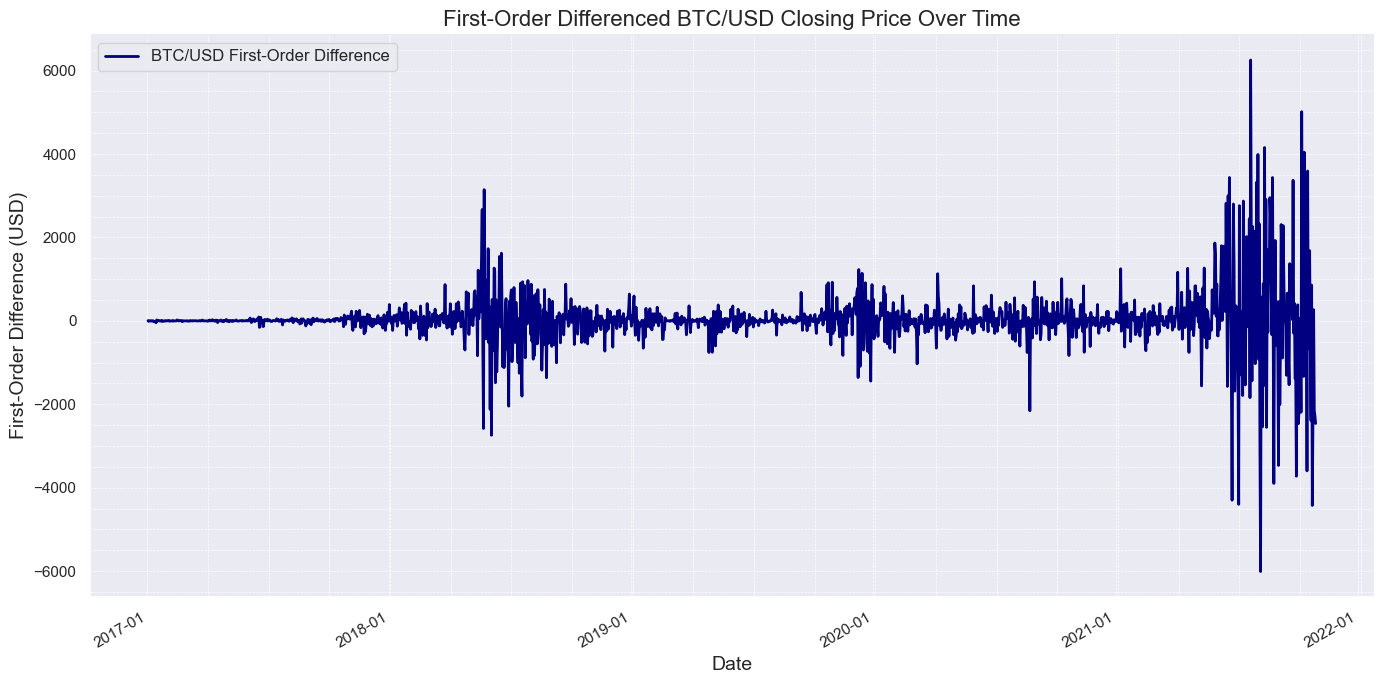

In [17]:
# Plotting the first-order differenced data
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Closing_Price_Diff'], color='navy', linewidth=2, label='BTC/USD First-Order Difference')

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('First-Order Differenced BTC/USD Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('First-Order Difference (USD)', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Remove the plot frame lines on the top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

In [18]:
#Perform decomposition
decomposition = seasonal_decompose(btc_data['Closing Price (USD)'], model='additive')

# Access the individual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

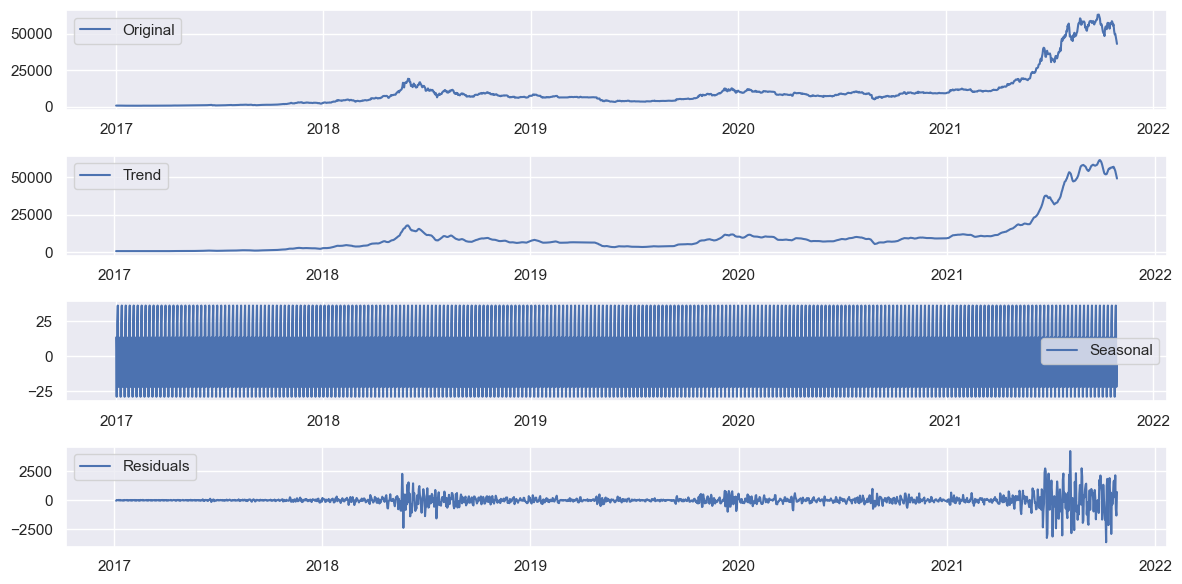

In [19]:
# Plot the components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(btc_data['Closing Price (USD)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
btc_data.head(20)

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Closing_Price_Diff
Date,,,,,
2017-01-01,663.03400,674.00800,674.85200,660.69300,NaN
2017-01-02,667.74700,663.03400,668.19700,663.03400,4.71300
2017-01-03,655.72500,667.74700,668.05800,646.15400,-12.02200
2017-01-04,655.89500,655.72500,657.43800,649.75800,0.17000
2017-01-05,661.28400,655.89500,664.91800,653.58300,5.38900
2017-01-06,656.41800,661.28400,662.30600,654.12799,-4.86600
2017-01-07,651.82899,656.41800,657.72799,645.65000,-4.58901
2017-01-08,657.91599,651.82899,660.51000,648.92499,6.08700
2017-01-09,656.42700,657.91599,659.63100,655.16099,-1.48899


In [ ]:
# Saving data

btc_data.to_csv(r'..\Data\Input\btc_data.csv', index=True)